<a href="https://colab.research.google.com/github/sonfeldalmos/Microservice-Example/blob/master/S%C5%91nfeld_%C3%81lmos_OD7XEP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework Assignment - Cartoon characters

This notebook is the stub you have to fill out for the homework. Read the task description and implement the empty code cells. Each section represents a stage along implementing an image classifier from loading and inspecting the dataset to making something working. The section descriptions contain what to do in that step.


Copy this notebook to your drive (File -> Save a copy in Drive), edit it and upload the final ipynb file to [canvas.elte.hu](canvas.elte.hu). If you have your own machine with Jupyter installed, you can work there as well.

**Note** Make sure the notebook is using GPU acceleration in Edit -> Notebook settings, otherwise training and evaluation can be very slow.

## Task description
Your task is to implement a deep learning classifier of charcters from the Simpsons TV show. The dataset has benn preprocessed, each image haivng the same resolution

## Rules and Comments
- As always, copying others' code will make you fail the course automatically.
- Make sure your code can be run from an empty state (use Runtime -> Run all in the menu after restarting the notebook)
- To ease grading, please keep all outputs in the notebook before submission.
- Feel free to add more code cells as needed. Don't put code into external Python files to help the reviewing.
- Please add your name and Neptune ID in the box below for easier identification.

**Name:Álmos Sőnfeld**  
**Neptun ID:OD7XEP** 

## Dataset preparations
First download the data and extract it:

In [ ]:
# Downloading the dataset
!curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=1QelVmKZNBwcLEwptawOKE76pTBvRGoA3" > /dev/null
!curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=`awk '/download/ {print $NF}' ./cookie`&id=1QelVmKZNBwcLEwptawOKE76pTBvRGoA3" -o simpsons_dataset_train.pkl

!curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=1wAYMLNO2xYJbK_p6z0KAaxea2jw2mkdA" > /dev/null
!curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=`awk '/download/ {print $NF}' ./cookie`&id=1wAYMLNO2xYJbK_p6z0KAaxea2jw2mkdA" -o simpsons_dataset_test.pkl

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   3813      0 --:--:-- --:--:-- --:--:--  3813
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  129M    0  129M    0     0  64.4M      0 --:--:--  0:00:02 --:--:-- 97.2M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0    280      0 --:--:--  0:00:01 --:--:--   280
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100 32.4M    0 32.4M    0     0  15.3M      0 --:--:--  0:00:02 --:--:--  102M


This downloads two Python pickle files, one for the training (`simpsons_dataset_train.pkl`) and one for the test set (`simpsons_dataset_test.pkl`). Both files contain a dictionary, the key `features` holds the images, the key `labels` the label ids. You can inspect the downloaded files in the sidebar on the left, under the *Files* tab.  The following code loads the dataset:

In [ ]:
import pickle
from tensorflow import keras
from tensorflow.keras.layers import Dense, Conv2D, BatchNormalization, Activation
from tensorflow.keras.layers import AveragePooling2D, Input, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
with open('simpsons_dataset_test.pkl', 'rb') as f:
    test = pickle.load(f)
with open('simpsons_dataset_train.pkl', 'rb') as f:
    train = pickle.load(f)
    
x_test, y_test = test['features'], test['labels']
x_train, y_train = train['features'], train['labels']


Notice that the original dataset does not define a validation set, you have to split it yourself. Split the training set into a training and validation set. Make sure in the validation set the classes have a similar distribution to the training set. [1p]


In [ ]:
# ADD YOUR CODE HERE
# It should create the variables x_train, y_train, x_valid, y_valid
# The training and validation set must be disjoint

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.20)

Now that you have set up the dataset, it's time to look at some of the images. Create a function that randomly selects 4 images from a class and shows them. [1p]

In [ ]:
def draw_images(imgs, labels, class_to_draw):
    selected = np.random.choice(len(imgs),4)

    plt.figure()
    for i, ind in enumerate(selected):
      plt.subplot(4,1,i+1)
      plt.imshow(x_train[ind], cmap='gray')
      plt.axis('off')

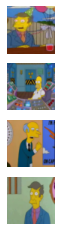

In [ ]:
# Show some images from class #2
draw_images(x_train, y_train, 2)

First, you should normalize the data. Apply a normalisation method of your choice that brings the data around 0, to the scale of 0-1.

Note: you may want to convert the datatype of `x_train` and `x_test` to float32 instead of the original uint8. Fractional values are not representable with a `uint8` datatype. [2p]

In [ ]:
# ADD YOUR CODE HERE
# IT SHOULD MODIFY x_train, and x_test the same way
x_train = x_train.astype('float32') / 255
x_valid = x_valid.astype('float32') / 255


## Training the network

Implement and train the following modified LeNet architecture. It has the following layers:

- A convolutional layer with 5x5 kernel and 8 filters
- An AveragePooling layer
- A convolutional layer with 3x3 kernel and 16 filters
- An AveragePooling layer
- A fully connected layer of 100 units
- A fully connected layer of 60 units
- A fully connected layer with softmax activation, having the same number of units as classes

All layers have ReLU activations. 

How many parameters does this network have? [2p]  
Álmos Sőnfeld's answer:
Total params: 322,146
Trainable params: 322,146
Non-trainable params: 0

**Write your answer here**

Now train the network for 50 epochs. [6p]

In [ ]:
from tensorflow.keras.layers import Dense,AveragePooling2D

model = keras.Sequential()

# The first convolutional layer
model.add(Conv2D(filters=8, kernel_size=(5,5), input_shape=(64, 64, 3), activation='relu'))        
model.add(AveragePooling2D(pool_size=(2,2))) 

# The second convolutional layer
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
model.add(AveragePooling2D(pool_size=(2,2)))

model.add(Flatten()),
model.add(Dense(100, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy']) 

history = model.fit(x_train, y_train, epochs=50, validation_data=(x_valid, y_valid)) 


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 60, 60, 8)         608       
_________________________________________________________________
average_pooling2d_2 (Average (None, 30, 30, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 16)        1168      
_________________________________________________________________
average_pooling2d_3 (Average (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               313700    
_________________________________________________________________
dense_4 (Dense)              (None, 60)               



```
# Ez kódként van formázva
```

Now that the model has finished training, plot the accuracy and loss over time, both for the training and the validation data [1p]:

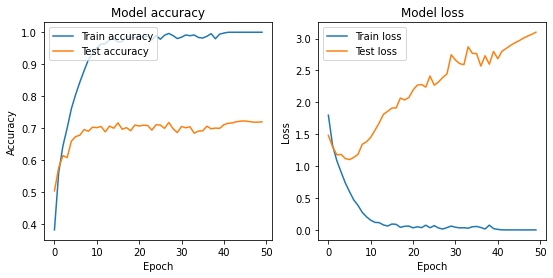

In [ ]:
plt.figure(figsize=(9,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train accuracy', 'Test accuracy'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train loss', 'Test loss'], loc='upper left')
plt.show()

How did the loss and accuracy curves change over time? What does it mean regarding the training process (i.e. overfit, underfit, etc.)? Is that a problem and how would you solve it? [3p]

**Write your answers below**
From the first diagram it can be seen that the accuracy on the train data set is converging to 1, yet the accuracy on the validation(test on the diagramm) can not follow this trend the limit of the validation accuracy is around 0.7.

From the second diagram it can be seen that the loss on the train data set is converge to 0 yet the loss on the validation dataset does not follow this trend. After 50 epoch it raches 3.0.

From this two diagramm it can be seen that the modell is overfitted to the training set.

With data augmentation the result might be more optimized


Finally, calculate the performance of your model on the test set [1p]:

In [ ]:
# ADD YOUR CODE HERE
loss, acc = model.evaluate(x_test, y_test, verbose=0)

print('Test loss: {}'.format(loss))
print('Test accuracy: {:.2%}'.format(acc))

Test loss: 955.610107421875
Test accuracy: 66.46%


## Improving the method

Add augmentations to the model, and retrain the network! Plot the training curves as well. [4p]

In [ ]:
x_trainAug, x_valid, y_trainAug, y_validAug=train_test_split(x_train, y_train, test_size=0.20)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
train_generator = train_datagen.
validation_generator = test_datagen.flow(x_valid)

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

SyntaxError: ignored

## Conclusions

You have trianed two models (one with augmentations and one without any). Compare their results. Write a couple of sentences which one would you choose and why. [3p]

In theory the augmented modell is performing better than the one without augmentations. The main reason is that the first modell was overfitted because the too few data. 

After the augmentation the number of the data is increased a lot thus the modell can train on more data and thus can performe better.

I would prefere to use the one with augmentation beacouse of its robustness.